In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [112]:
df = pd.read_csv('data.csv', names=["time", "x", "y", "z"])

df

,time,x,y,z
0,6424.0,-0.002535,0.022294,0.060766
1,6424.0,-0.002536,0.022295,0.060765
2,6440.0,-0.013410,0.015836,0.052195
3,6441.0,-0.013411,0.015837,0.052195
4,6457.0,0.006815,0.012605,0.040675
...,...,...,...,...
199,8074.0,-0.024984,-0.008489,0.041164
200,8090.0,0.008386,0.053540,0.067997
201,8090.0,0.008389,0.053541,0.067995
202,8108.0,0.017552,0.077418,0.065545


In [113]:
_sum = 0
for cnt in range(0, len(df)-1):
    _sum += df["time"][cnt+1] - df["time"][cnt]
    
samplingRate = _sum / (len(df)-1) / 1000

samplingRate

0.008300492610837438

In [114]:
q = 0.7

cutoff = 0.01

omega = 2 * np.pi * cutoff / samplingRate
alpha = np.sin(omega) / (2 * q)

a0 = 1 + alpha
a1 = -2 * np.cos(omega)
a2 = 1 - alpha
b0 = (1 - np.cos(omega)) / 2
b1 = 1 - np.cos(omega)
b2 = (1 - np.cos(omega)) / 2

in1 = np.zeros(3)
in2 = np.zeros(3)
out1 = np.zeros(3)
out2 = np.zeros(3)

accelerationFiltered = []

for cnt in range(0, len(df)):
    _input = np.array([df["x"][cnt], df["y"][cnt], df["z"][cnt]])
    
    outputThis = (b0 / a0) * _input + (b1 / a0) * in1 + (b2 / a0) * in2 - (a1 / a0) * out1 - (a2 / a0) * out2
   
    accelerationFiltered.append(outputThis)
   
    in2 = in1
    in1 = _input

    out2 = out1
    out1 = outputThis 

compare the filtered acceleration with the raw acceleration

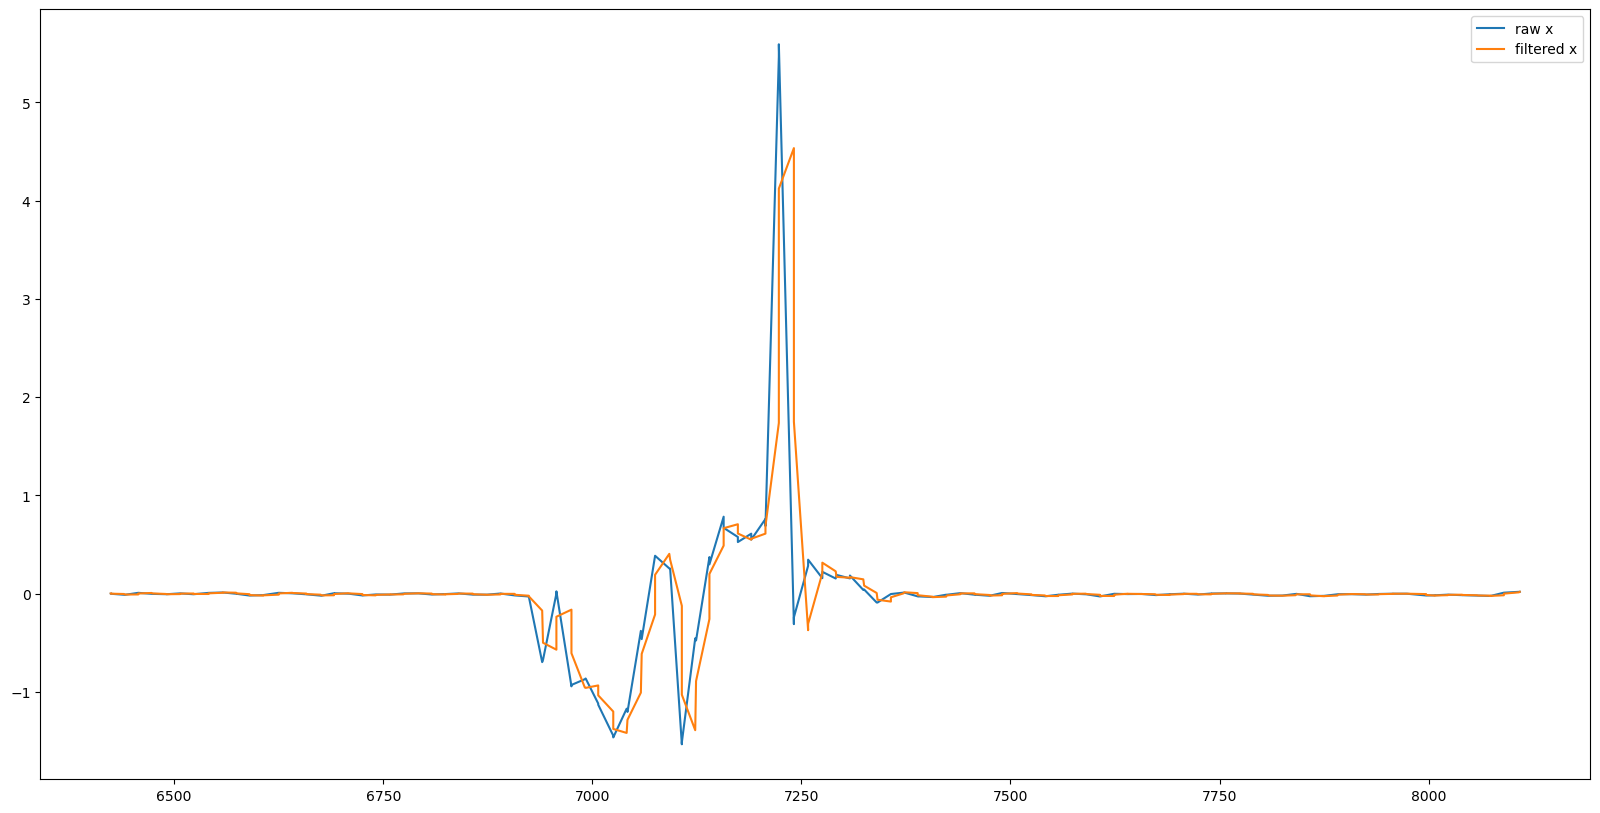

In [115]:
#x
plt.figure(figsize=(20,10))
plt.plot(df["time"], df["x"], label="raw x")
plt.plot(df["time"], [i[0] for i in accelerationFiltered], label="filtered x")
plt.legend()

velocity

In [116]:
velocity = [np.zeros(3)]

for cnt in range(0, len(df)-1):
    velocity.append(velocity[cnt] + accelerationFiltered[cnt] * samplingRate)

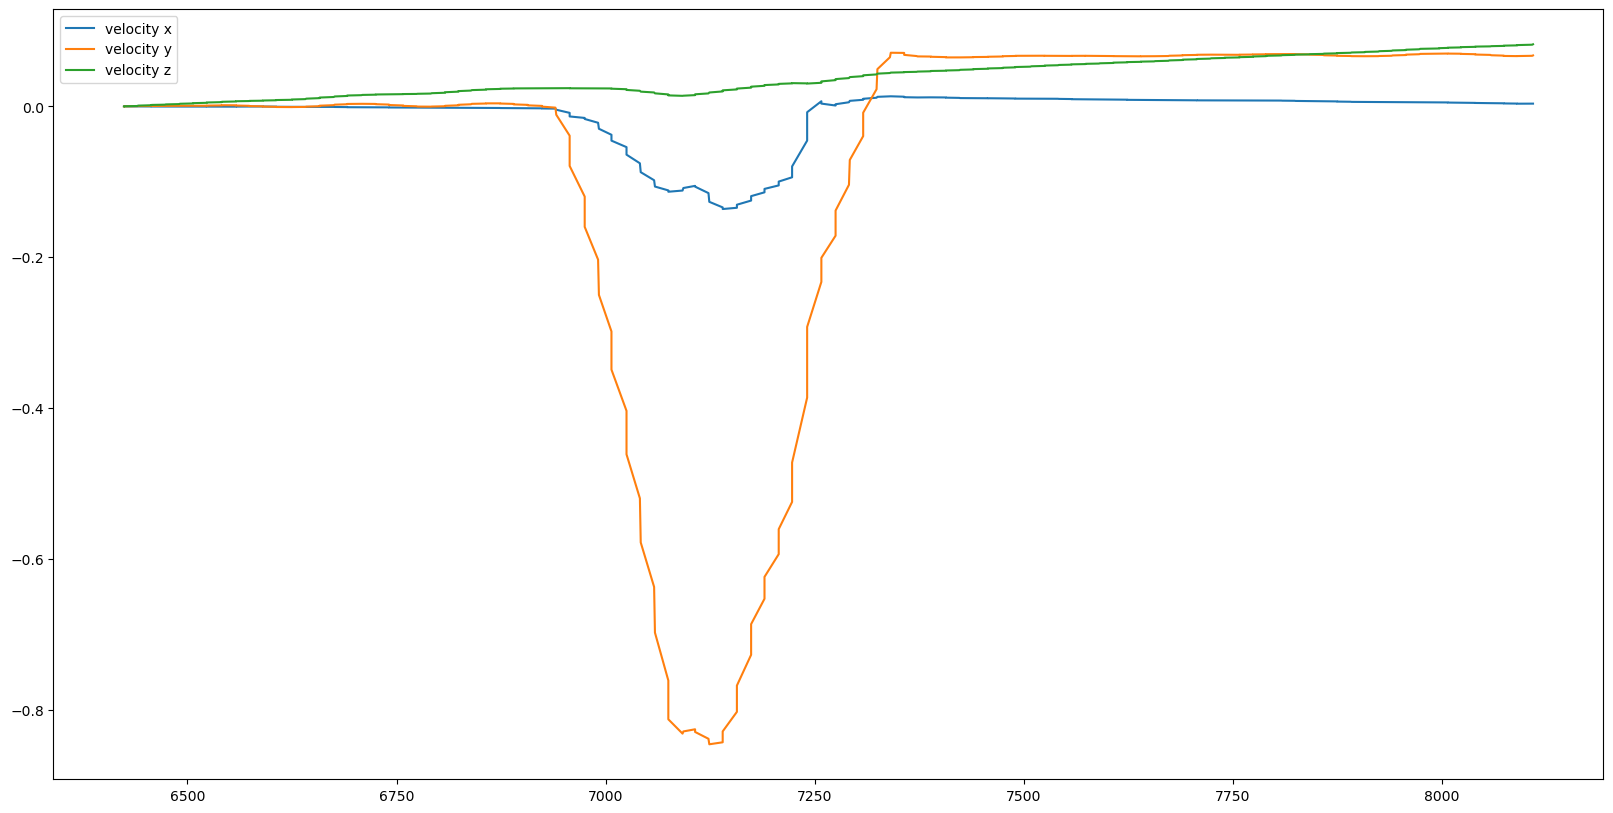

In [117]:
plt.figure(figsize=(20,10))
plt.plot(df["time"], [i[0] for i in velocity], label="velocity x")
plt.plot(df["time"], [i[1] for i in velocity], label="velocity y")
plt.plot(df["time"], [i[2] for i in velocity], label="velocity z")
plt.legend()


distance

In [118]:
distance = np.zeros(3)

for cnt in range(0, len(velocity)):
    distance += velocity[cnt] * samplingRate
    
distance

array([-0.01874868, -0.12134052,  0.0660418 ])